In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

try:
    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
    import seaborn as sns
    # Input data files are available in the "../input/" directory.
    # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
    import matplotlib.pyplot as plt
    import os
except ImportError:
    pass
# Any results you write to the current directory are saved as output.

In [8]:
data = pd.read_csv('../input/StudentsPerformance.csv')

In [9]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
data.columns = ['Gender', 'Race', "Parent's Education", 'Lunch', 
                'Preparation Course', 'Math Score', 'Reading Score', 'Writing Score']

In [17]:
print(data.isnull().any())
print('----------------------')
print(data.isna().sum())

Gender                False
Race                  False
Parent's Education    False
Lunch                 False
Preparation Course    False
Math Score            False
Reading Score         False
Writing Score         False
dtype: bool
----------------------
Gender                0
Race                  0
Parent's Education    0
Lunch                 0
Preparation Course    0
Math Score            0
Reading Score         0
Writing Score         0
dtype: int64


In [18]:
data.describe()

,Math Score,Reading Score,Writing Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [33]:
data['Total Score'] = data['Math Score'] + data['Reading Score'] + data['Writing Score']

In [34]:
data.dtypes

Gender                object
Race                  object
Parent's Education    object
Lunch                 object
Preparation Course    object
Math Score             int64
Reading Score          int64
Writing Score          int64
Total Score            int64
dtype: object

In [27]:
data[['Race', "Parent's Education", 'Preparation Course']].head(10)

,Race,Parent's Education,Preparation Course
0,group B,bachelor's degree,none
1,group C,some college,completed
2,group B,master's degree,none
3,group A,associate's degree,none
4,group C,some college,none
5,group B,associate's degree,none
6,group B,some college,completed
7,group B,some college,none
8,group D,high school,completed
9,group B,high school,none


In [36]:
print("Average math score is    : {}".format(np.mean(data['Math Score'])))
print("Average reading score is : {}".format(np.mean(data['Reading Score'])))
print("Average writing score is : {}".format(np.mean(data['Writing Score'])))
print("Average total score is   : {}".format(np.mean(data['Total Score'])/3))

Average math score is    : 66.089
Average reading score is : 69.169
Average writing score is : 68.054
Average total score is   : 67.77066666666667


In [55]:
data['Math Score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: Math Score, dtype: float64

In [68]:
math_mean = data['Math Score'].mean()
math_max = data['Math Score'].max()
print(math_mean)
print(math_max)

66.089
100


In [39]:
data['Preparation Course'].value_counts()

none         642
completed    358
Name: Preparation Course, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: 

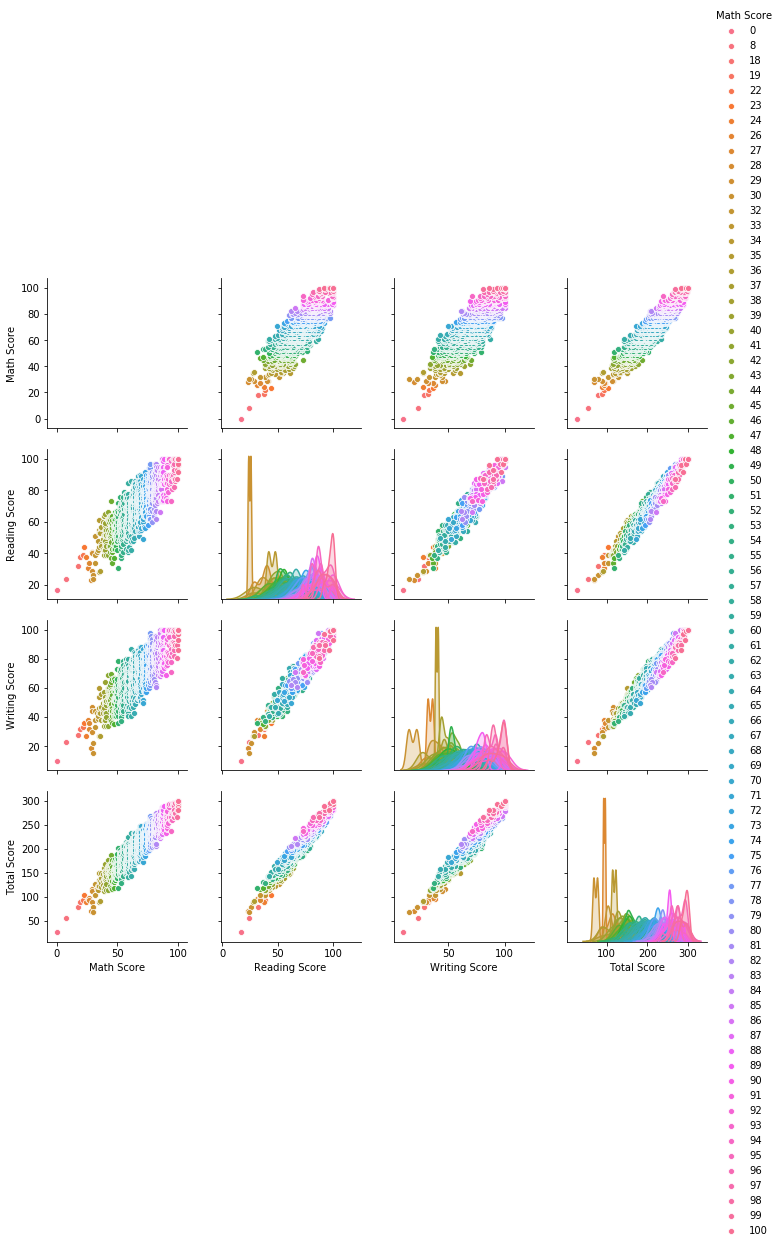

In [73]:
sns.pairplot(data, hue='Math Score')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


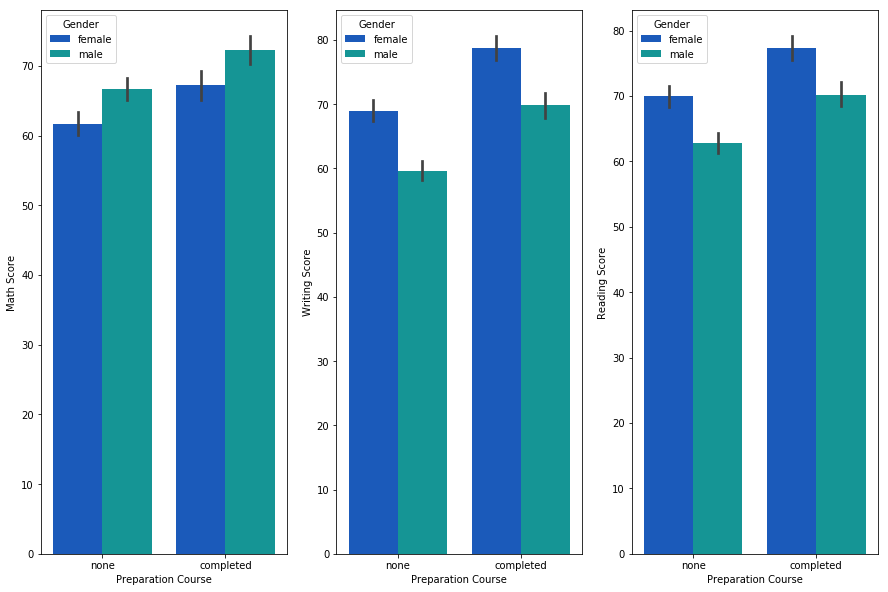

In [97]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.barplot(x = 'Preparation Course', y = 'Math Score', data = data, hue="Gender", palette='winter')

plt.subplot(1,3,2)
sns.barplot(x = 'Preparation Course', y = 'Writing Score', data = data, hue="Gender", palette='winter')

plt.subplot(1,3,3)
sns.barplot(x = 'Preparation Course', y = 'Reading Score', data = data, hue="Gender", palette='winter')

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


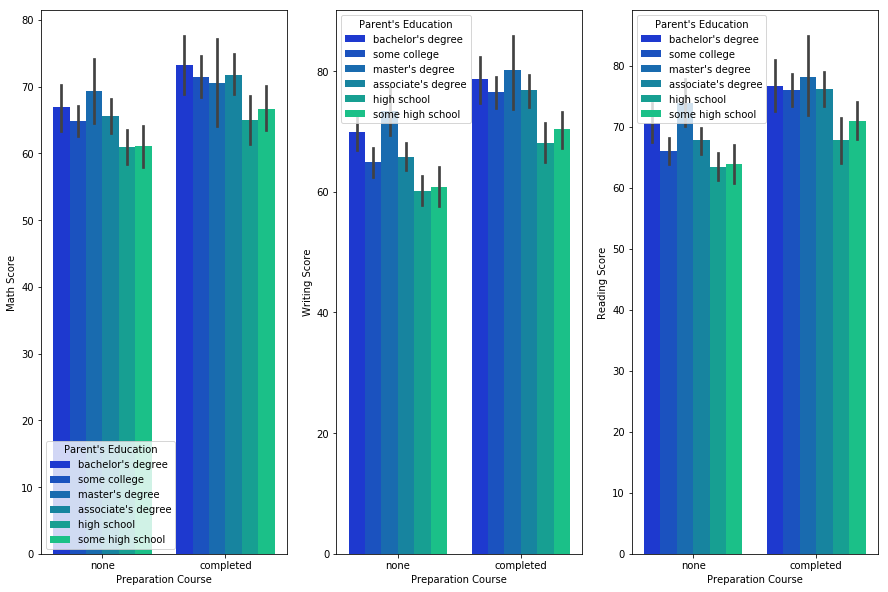

In [98]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.barplot(x = 'Preparation Course', y = 'Math Score', data = data, hue="Parent's Education", palette='winter')

plt.subplot(1,3,2)
sns.barplot(x = 'Preparation Course', y = 'Writing Score', data = data, hue="Parent's Education", palette='winter')

plt.subplot(1,3,3)
sns.barplot(x = 'Preparation Course', y = 'Reading Score', data = data, hue="Parent's Education", palette='winter')

plt.show()

In [102]:
data[(data['Math Score'] > 90) & (data['Reading Score'] > 90) & (data['Writing Score']>90)]\
.sort_values(by=['Total Score'],ascending=False).head(5)

,Gender,Race,Parent's Education,Lunch,Preparation Course,Math Score,Reading Score,Writing Score,Total Score
962,female,group E,associate's degree,standard,none,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297


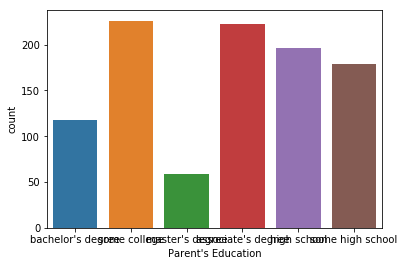

In [109]:
sns.countplot(x = "Parent's Education", data = data)